# Exercise: Supervised and Unsupervised Machine Learning

Using the iris dataset from the previous lesson, we're going to create two models, one supervised, one unsupervised, and compare how their predictions differ.

Complete the notebook by filling in the code where there are `?`.

In [1]:
import numpy as np
import pandas as pd
import sklearn
from sklearn import datasets

In [2]:
# Load in the iris dataset
iris = datasets.load_iris()

In [3]:
# Create the iris `data` dataset as a dataframe and name the columns with `feature_names`
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# Include the target as well
df['target'] = iris.target

In [4]:
# Check your dataframe by `.head()`
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


In [5]:
# Target values as an array to compare against supervised and unsupervised
df["target"].to_numpy()

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [16]:
print(df.target)

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int64


## Supervised ML

In [6]:
from sklearn.linear_model import LinearRegression

In [25]:
# initialize and fit a linear regression model
reg = LinearRegression().fit(df[iris.feature_names], df["target"])

In [8]:
# Scoring of the linear regression model, but slighly deceiving since the iris dataset is classifying not regression
reg.score(df[iris.feature_names], df["target"])

0.9303939218549564

In [29]:
# regression output floating point numbers
reg_model = reg.predict(df[iris.feature_names])
df['regression'] = np.abs(np.round(reg_model,0)).astype(int)



# Unsupervised ML

In [10]:
from sklearn.cluster import KMeans

In [33]:
# We already know the number of clusters, we can use during fit, hint: it's the number of classes
kmeans_1 = KMeans(n_clusters=3, random_state=0).fit(df[iris.feature_names])

In [34]:
# Print the labels to see what value is in what cluster

df['kmeans_1'] = kmeans_1.labels_  
kmeans_1.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [19]:
# What happens if we cluster more than the actual classes?
kmeans_2 = KMeans(n_clusters=4, random_state=0).fit(df[iris.feature_names])

In [42]:
# Print the labels to see what value is in what cluster
kmeans_2.labels_
df['kmeans_2'] = kmeans_2.labels_

In [43]:
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  kmeans_1  regression  kmeans_2  
0       0         1           0         1  
1       0         1           0         1  
2       0         1           0         1  
3       0         1           0         1  
4       0         1           0         1  


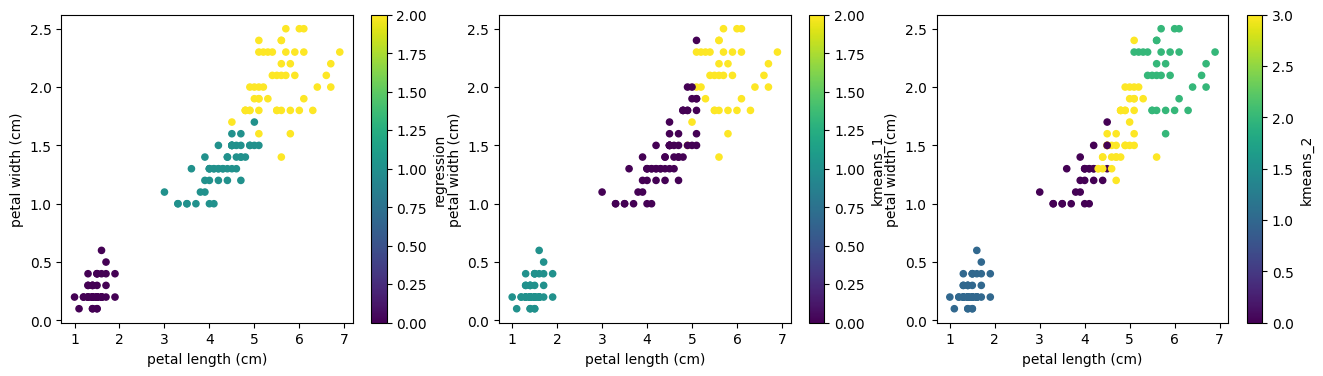

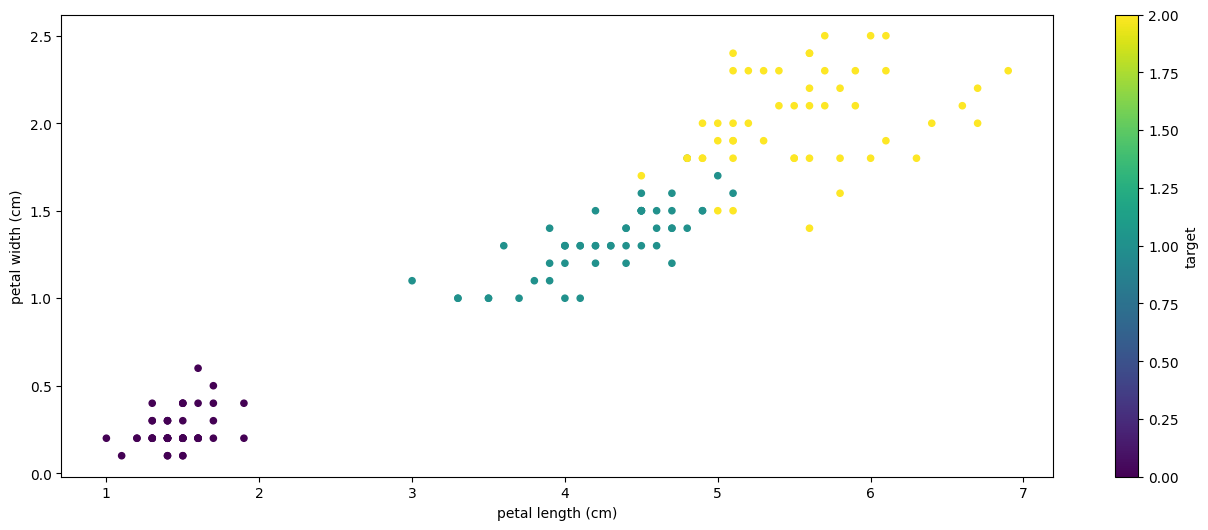

In [47]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16, 4))
df.plot(ax=axes[0], x='petal length (cm)', y='petal width (cm)', kind='scatter', c='regression', colormap='viridis')
df.plot(ax=axes[1], x='petal length (cm)', y='petal width (cm)', kind='scatter', c='kmeans_1', colormap='viridis')
df.plot(ax=axes[2], x='petal length (cm)', y='petal width (cm)', kind='scatter', c='kmeans_2', colormap='viridis')

plt.show()
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(16, 6))
df.plot(ax=axes, x='petal length (cm)', y='petal width (cm)', kind='scatter', c='target', colormap='viridis')
plt.show()

